In [3]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import ast
from pandas import Series, DataFrame

%matplotlib inline

# Netzwork Analysis - 1 day Networks (cam0) with different parameters (interaction_length & radius)

In [4]:
# getting all the network files from one directory

files = []
for file in os.listdir("1day_params"):
    if file.endswith(".graphml"):
        files.append(file)

In [19]:
# Analyse Networks
stat_list = []
for f in files:
    G = nx.read_graphml("1day_params/{}".format(f))
    stat_map = prep.network_statistics(G)
    stat_map.update({'dist': int(f.split("_")[3].split("dist")[0])})
    stat_map.update({'ilen': int(f.split("_")[4].split("ilen")[0])})
    stat_list.append(stat_map)
    print(".", end="")

.................................................

In [20]:
df = DataFrame(stat_list)

In [21]:
df.sort_values(by='ilen')

,av_deg,av_shortest_path,cc,components,degree,density,diameter,dist,edges,ilen,nodes
0,200.590361,2.351106,0.479716,2,"(282, 228, 2, 1, 3, 400, 1, 474, 3, 1, 578, 1,...",0.100749,4,150,199788,3,1992
4,90.053483,2.424102,0.210101,1,"(53, 60, 1, 124, 2, 211, 1, 231, 1, 48, 80, 1,...",0.063418,5,100,63983,3,1421
37,189.268495,2.370906,0.448570,2,"(251, 204, 2, 1, 3, 357, 4, 448, 3, 1, 539, 1,...",0.097965,5,140,182928,3,1933
7,176.354348,2.384761,0.409395,2,"(200, 180, 1, 1, 1, 324, 3, 415, 429, 2, 1, 49...",0.095897,5,130,162246,3,1840
33,157.947735,2.396907,0.355411,2,"(152, 145, 1, 1, 1, 284, 2, 373, 2, 1, 429, 1,...",0.091777,5,120,135993,3,1722
32,127.972117,2.417171,0.288859,2,"(100, 94, 1, 1, 208, 2, 304, 1, 333, 1, 81, 13...",0.081149,5,110,100970,3,1578
47,209.903101,2.337062,0.516792,2,"(320, 1, 249, 2, 2, 3, 434, 1, 1, 510, 3, 2, 6...",0.101747,5,160,216620,3,2064
44,151.403315,2.176631,0.323718,1,"(185, 89, 83, 1, 1, 238, 2, 296, 312, 6, 1, 95...",0.119592,4,150,95914,6,1267
40,131.530825,2.202626,0.283388,1,"(147, 69, 58, 1, 1, 206, 106, 1, 270, 268, 5, ...",0.105393,5,140,82141,6,1249
39,52.220848,2.321342,0.134047,1,"(57, 20, 16, 1, 72, 117, 118, 115, 3, 1, 33, 1...",0.046172,5,110,29557,6,1132


limit_output extension: Maximum message size of 10000 exceeded with 15603 characters

In [22]:
df.to_csv("stat.csv", sep=";")

# Plots zur Auswertung

In [95]:
df = pd.read_csv("stat.csv", sep=";", index_col=0)

In [6]:
df.head(2)

,av_deg,av_shortest_path,cc,components,degree,density,diameter,dist,edges,ilen,nodes
0,200.590361,2.351106,0.479716,2,"dict_values([282, 228, 2, 1, 3, 400, 1, 474, 3...",0.100749,4,150,199788,3,1992
1,38.960674,2.406779,0.114351,1,"dict_values([40, 13, 9, 43, 91, 79, 99, 3, 65,...",0.036514,5,120,20805,9,1068


`ilen` and `dist` are parameters I wanted to look at.

* [X] av_deg
* [X] av_shortest_path
* [X] cc
* [X] components
* [X] degree
* [X] density
* [X] diameter
* [X] edges
* [X] nodes


In [61]:
df.columns

Index(['av_deg', 'av_shortest_path', 'cc', 'components', 'degree', 'density',
       'diameter', 'dist', 'edges', 'ilen', 'nodes'],
      dtype='object')

In [84]:
def plotting(prop):
    grid = sns.FacetGrid(df, col="ilen", col_wrap=7)
    grid.map(plt.scatter, "dist", prop)

## Number of Nodes

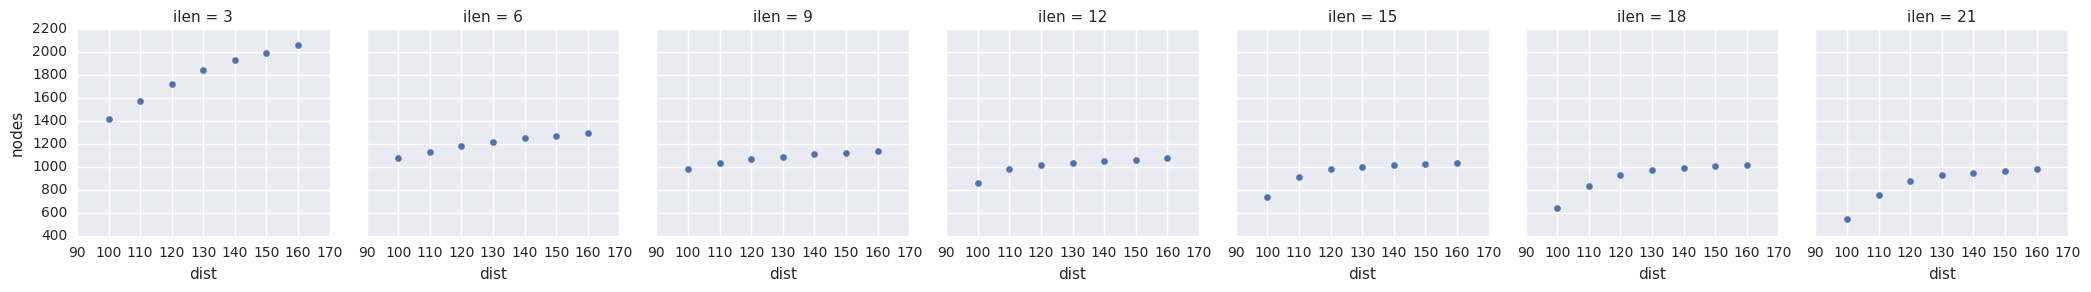

In [83]:
plotting("nodes")

## Number of Edges

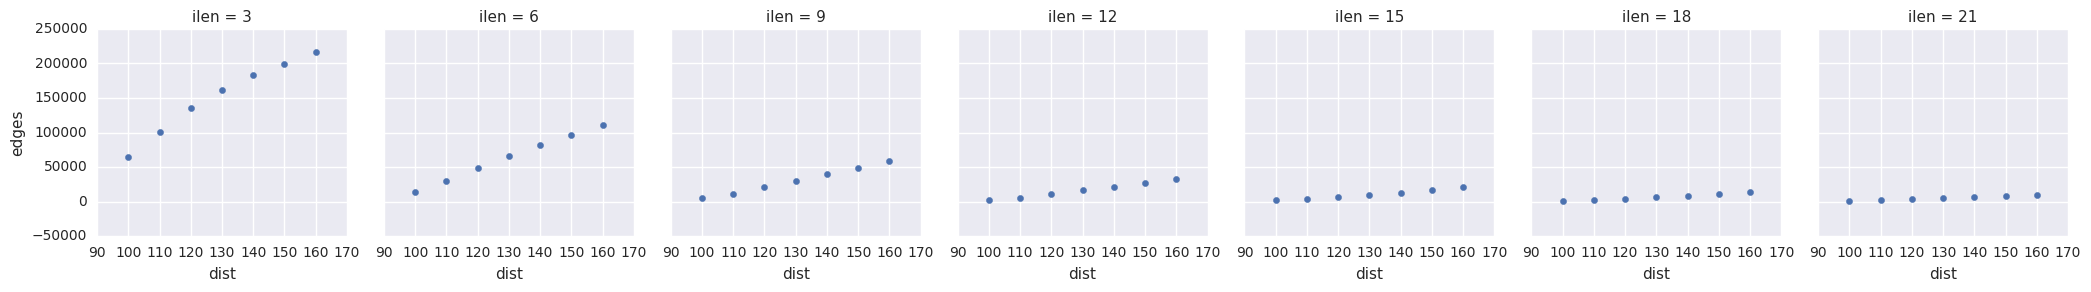

In [85]:
plotting("edges")

## Density

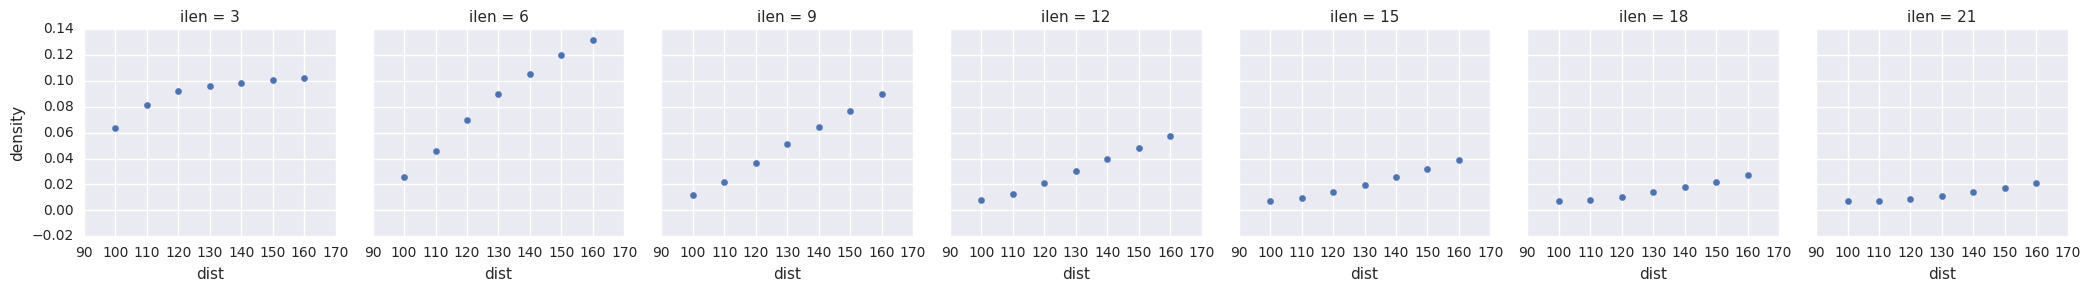

In [86]:
plotting("density")

## Daimeter

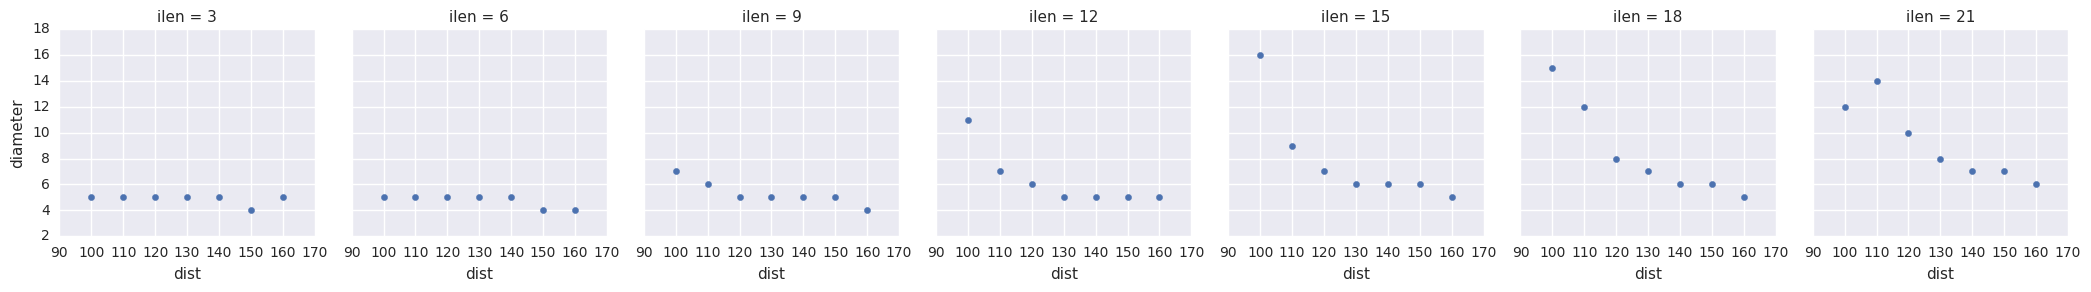

In [87]:
plotting("diameter")

## Average Degree

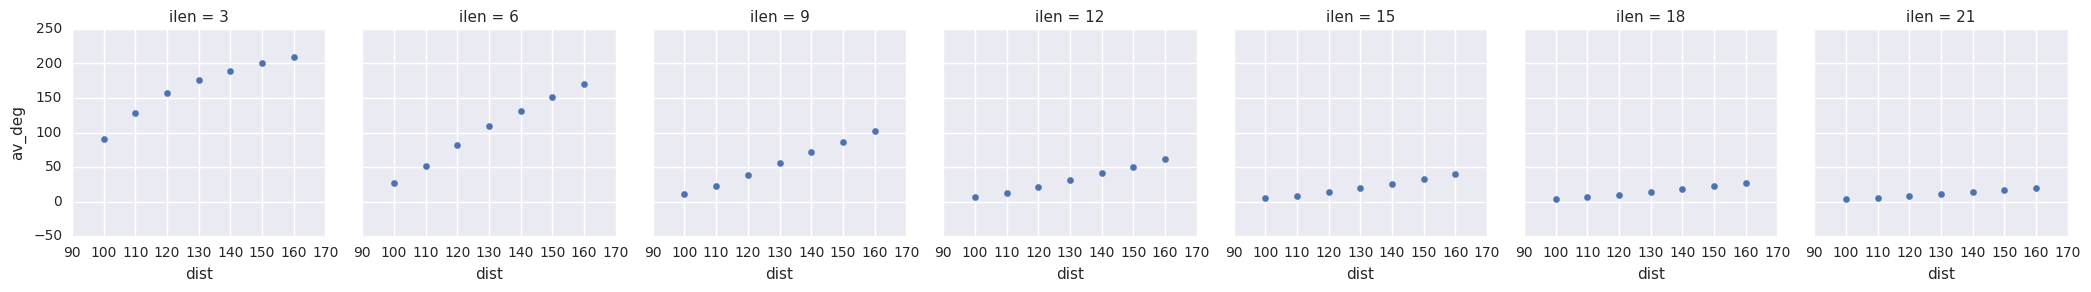

In [88]:
plotting("av_deg")

## CC

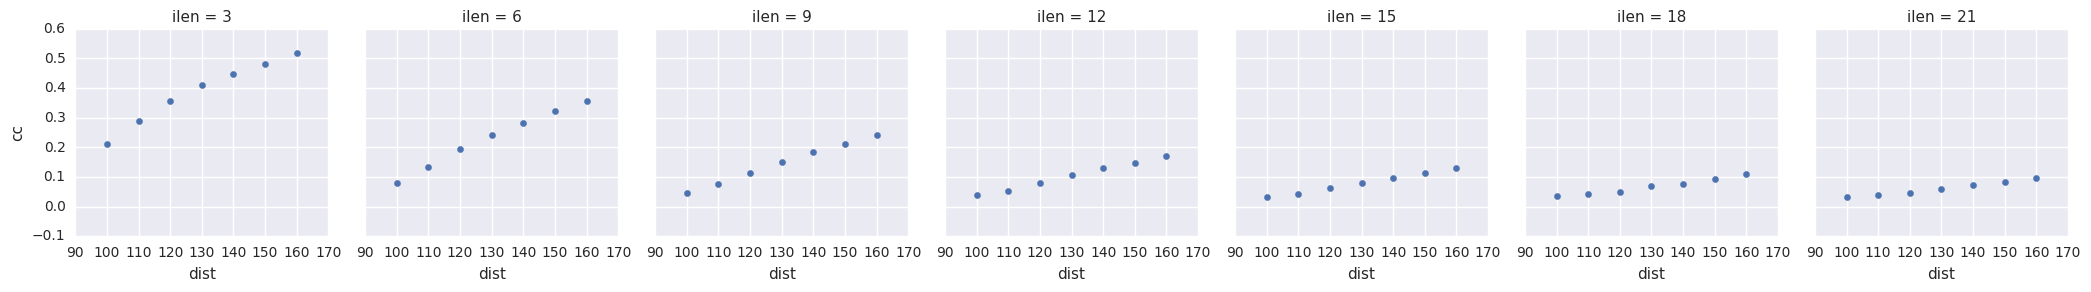

In [89]:
plotting("cc")

## av_shortest_path

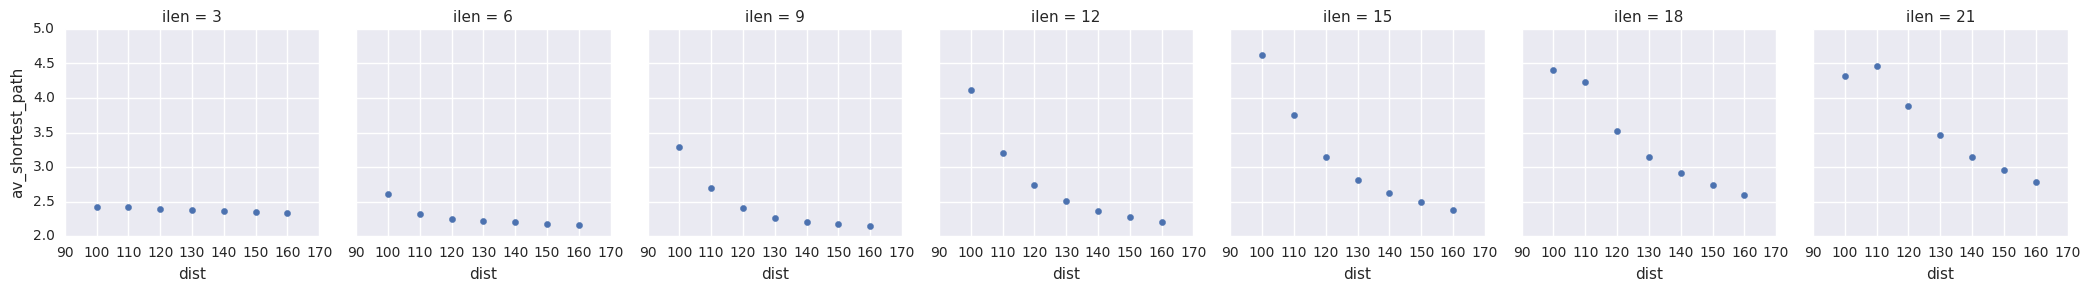

In [90]:
plotting("av_shortest_path")

## Components

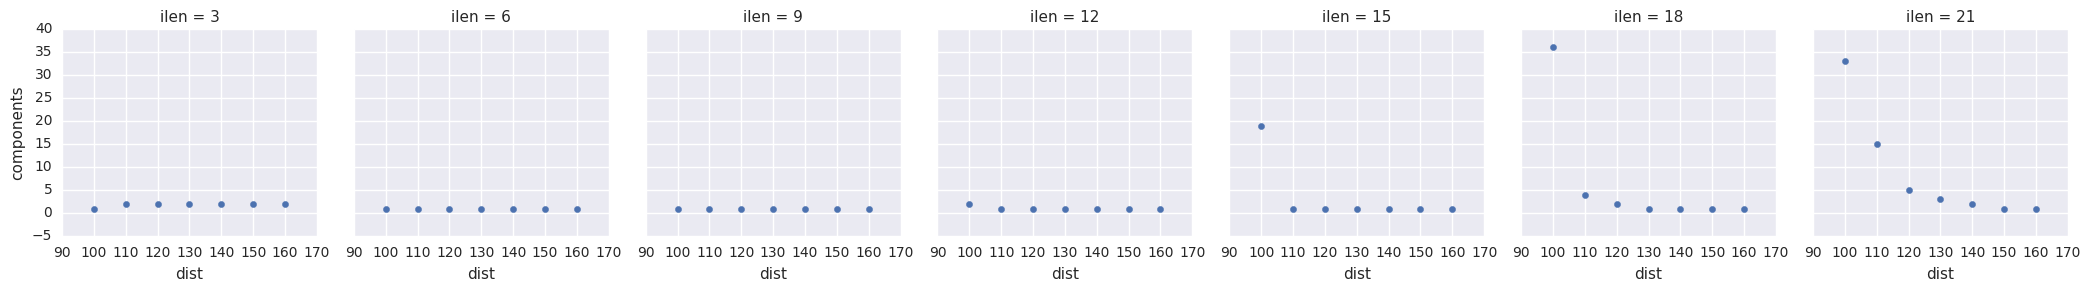

In [91]:
plotting("components")

## Degree

In [7]:
df.degree = df.degree.apply(lambda x: ast.literal_eval(x.split("(")[1].split(")")[0]))

In [1]:
def plottingDegree():
    grid = sns.FacetGrid(df, col="ilen", row="dist")
    grid.map(plt.hist, "degree")
    grid.fig.tight_layout(w_pad=1)

In [41]:
d1 = {100:0, 110:1, 120:2, 130:3, 140:4, 150:5, 160:6}
d2 = {3:0, 6:1, 9:2, 12:3, 15:4, 18:5, 21:6}

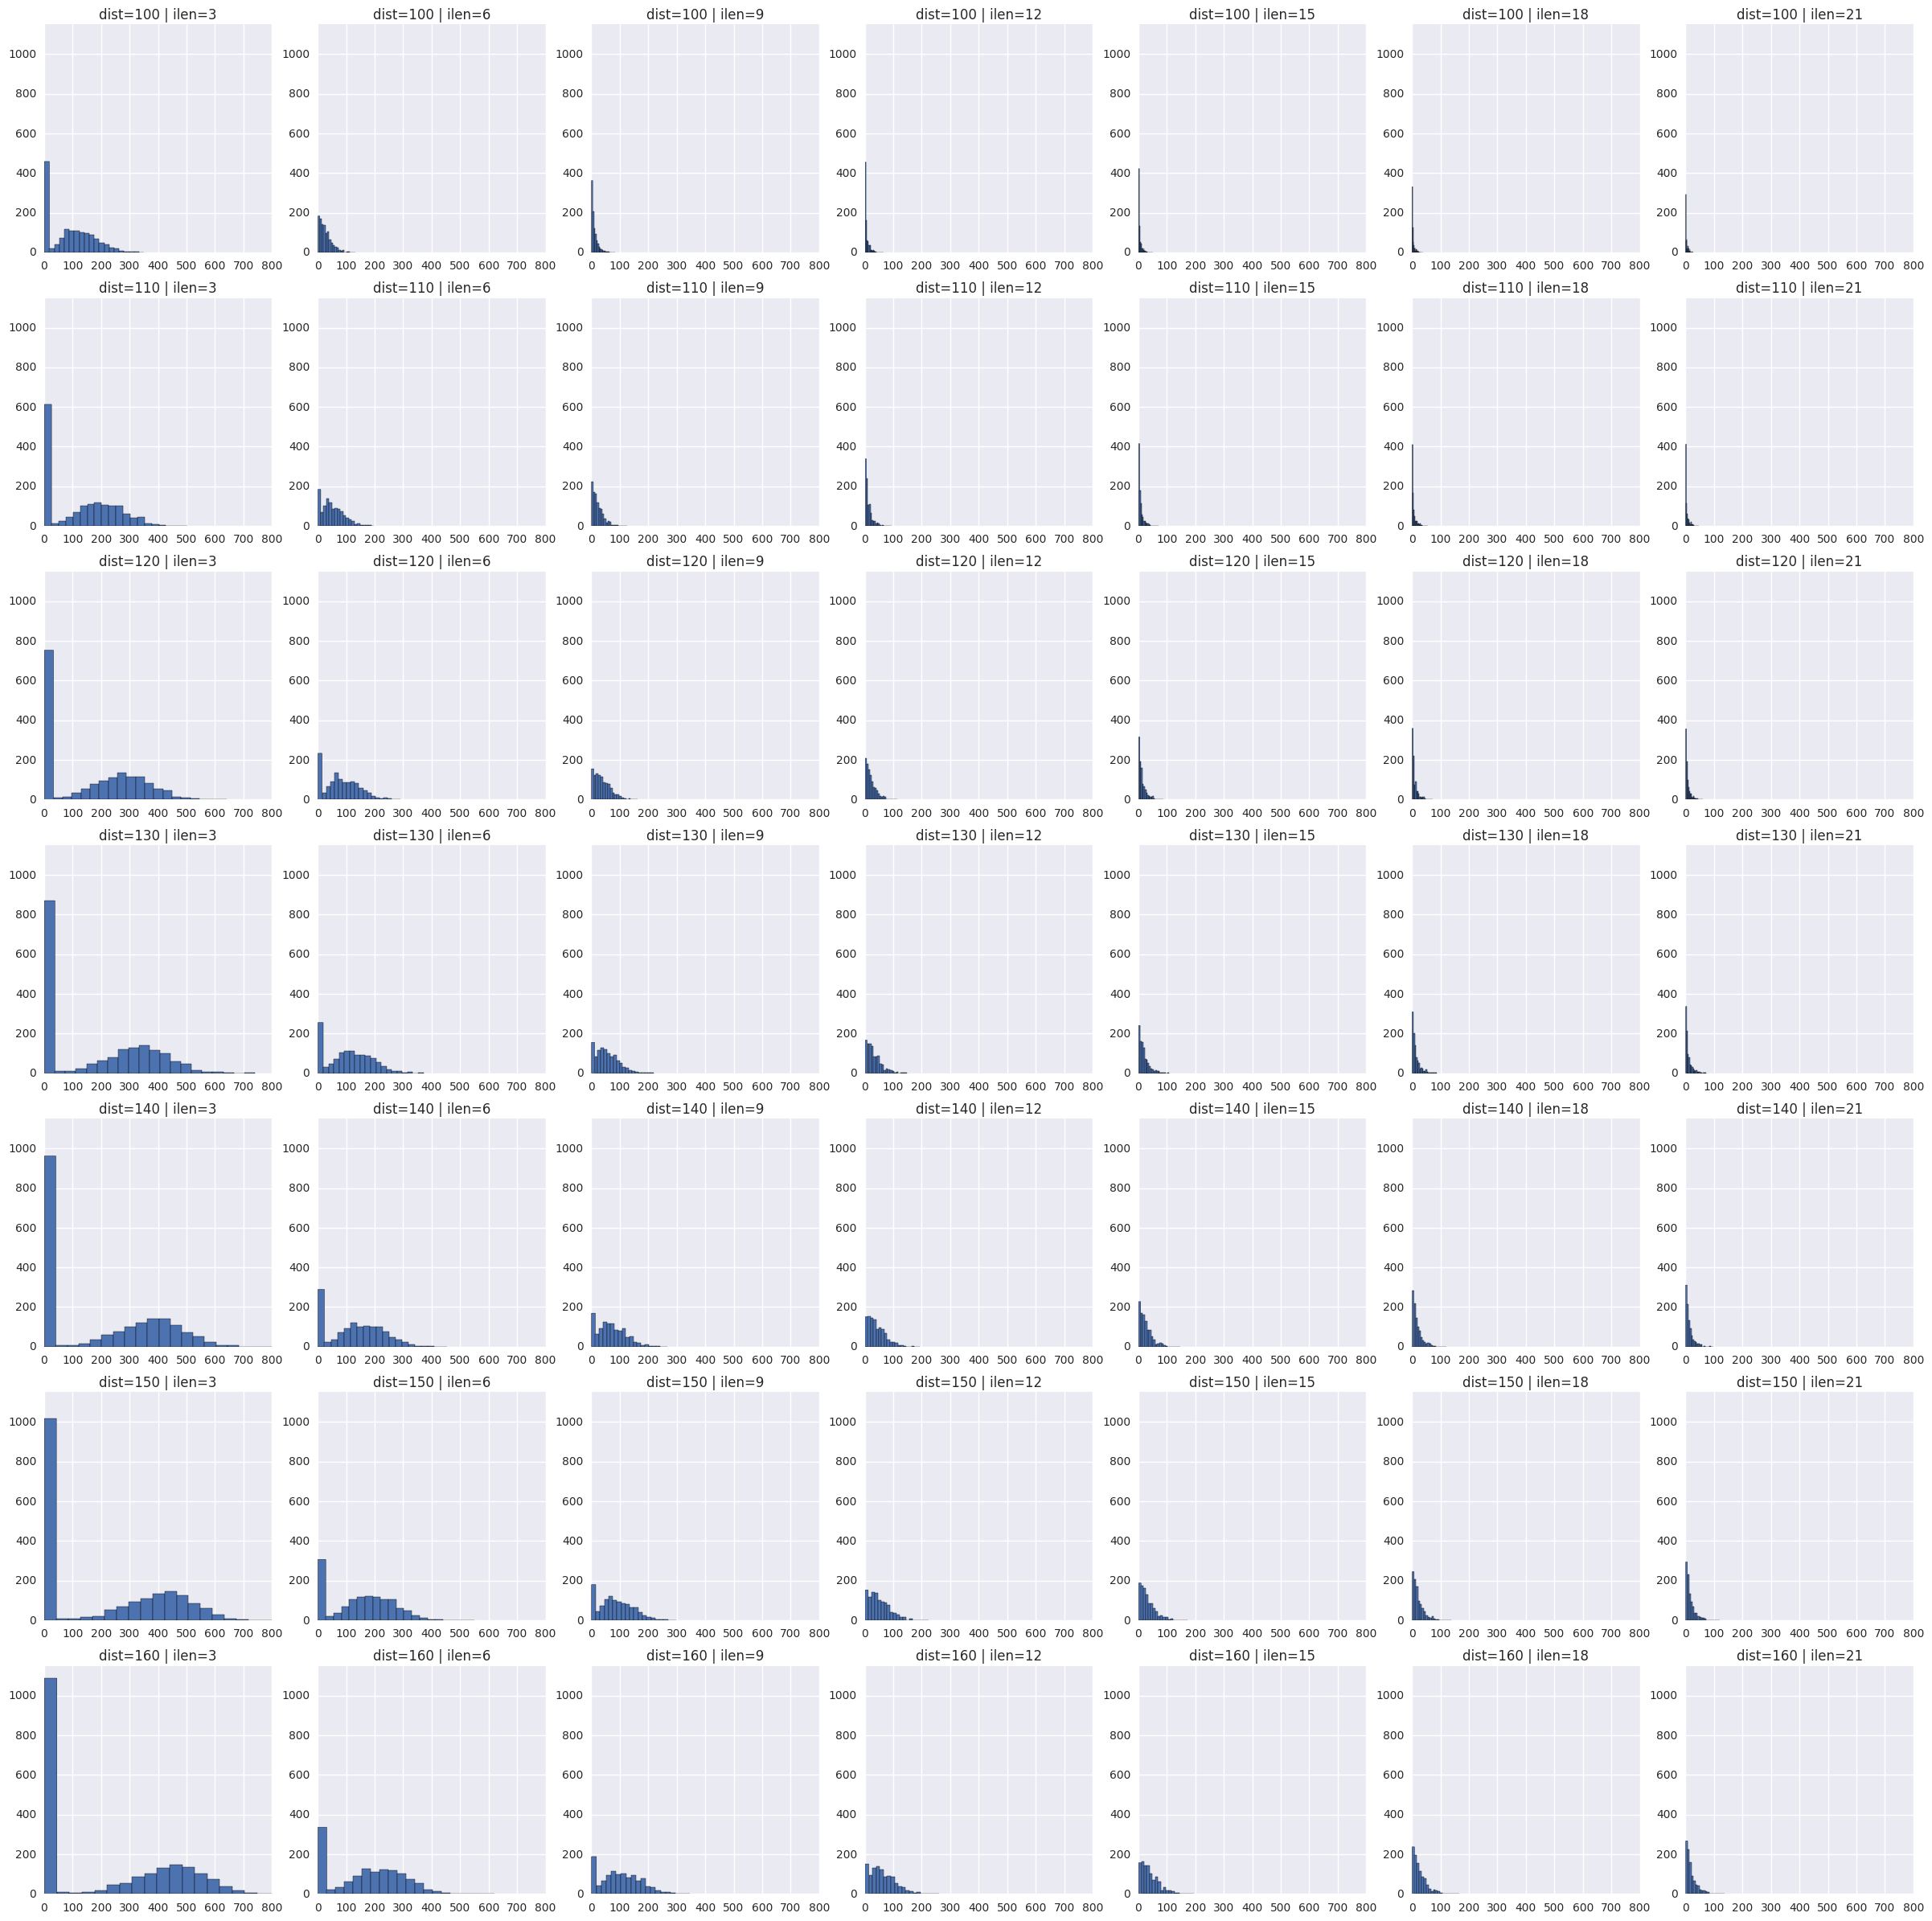

In [66]:
fig, axes = plt.subplots(7,7)

for gr, group in df.groupby(by=["dist", "ilen"]):
    nrow = d1[gr[0]]
    ncol = d2[gr[1]]
    axes[nrow,ncol].hist(group.degree, bins=20)
    axes[nrow,ncol].set_title("dist={} | ilen={}".format(gr[0],gr[1]))
    axes[nrow,ncol].set_xlim(0,800)
    axes[nrow,ncol].set_ylim(0,1150)

#fig.tight_layout()  # Improves appearance a bit.
fig.set_size_inches(30,30)
plt.show()

# Heatmaps

In [109]:
def plotHeatmap(property):
    result = df.pivot(index='ilen', columns='dist', values=property)
    fig, axes = plt.subplots()
    axes.set_title(property)
    sns.heatmap(result, cmap='viridis', ax=axes)
    plt.show()

In [117]:
liste = ['av_deg', 'av_shortest_path', 'cc', 'components', 'density',
         'diameter', 'edges', 'nodes']

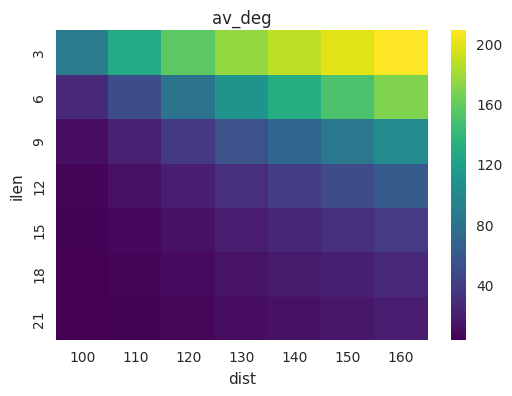

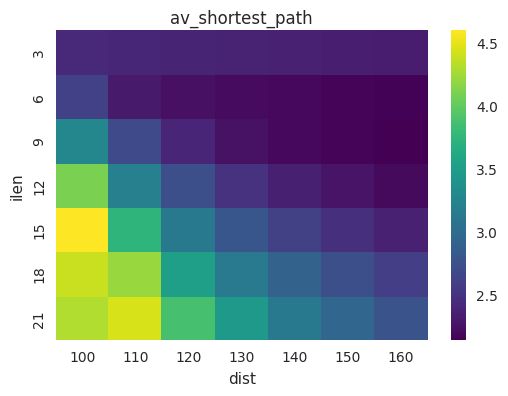

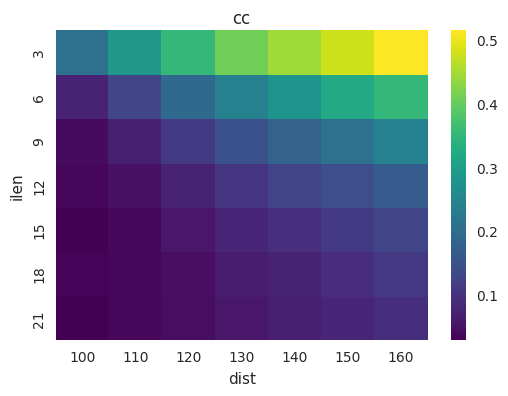

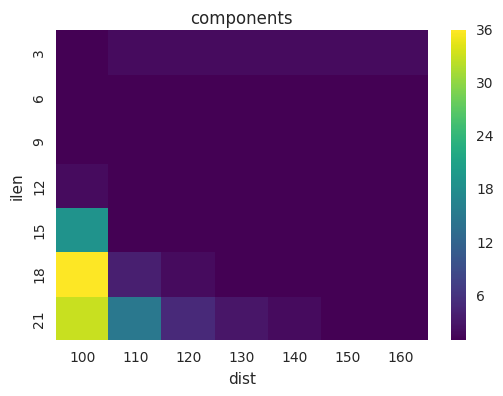

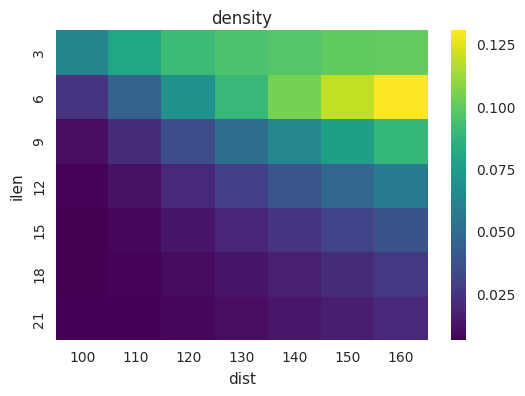

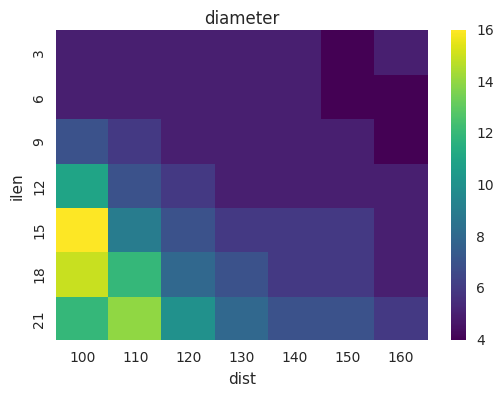

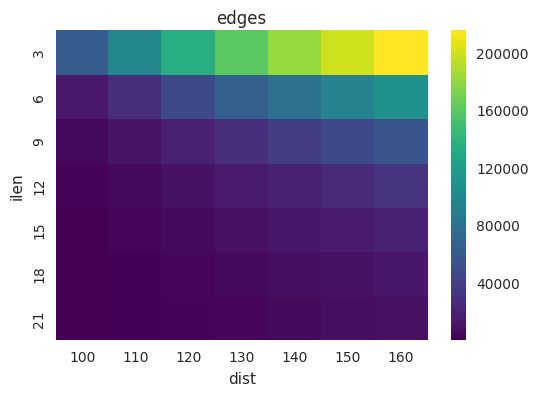

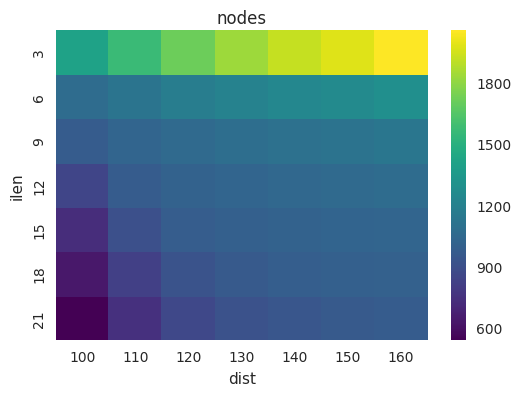

In [118]:
for l in liste:
    plotHeatmap(l)